In [2]:
%load_ext autoreload
%autoreload 2

import CustomModule as cm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
df = cm.LoadHousingData()

In [43]:
df.head().columns.tolist()

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'cost']

## EDA

In [55]:
import pandas as pd

df = pd.read_csv('dsc-phase-2-project/data/kc_house_data.csv')

In [44]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,cost
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,1970.999676,98077.951845,47.560093,-122.213982,3.182892e+05
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,29.375234,53.513072,0.138552,0.140724,1.404702e+05
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000,47.155900,-122.519000,5.661000e+04
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000,47.471100,-122.328000,2.187900e+05
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,98065.000000,47.571800,-122.231000,2.922300e+05
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,98118.000000,47.678000,-122.125000,3.901500e+05
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,98199.000000,47.777600,-121.315000,2.071620e+06


In [58]:
# Columns that aren't needed

drop_cols = ['date',
             'view',
             'sqft_above',
             'sqft_basement',
             'yr_renovated', 
             'sqft_living15',
             'sqft_lot15']

df.drop(columns=drop_cols,inplace=True)

In [9]:
seventyfive = df.describe().price[6]
fifty = df.describe().price[5]
twentyfive = df.describe().price[4]

seventyfive

645000.0

In [10]:
df['price_bin'] = [(3 if x > seventyfive
                      else (2 if x > fifty
                           else (1 if x > twentyfive
                                else 0))) 
                   for x in df['price']]

AttributeError: 'PathCollection' object has no property 'xlabel'

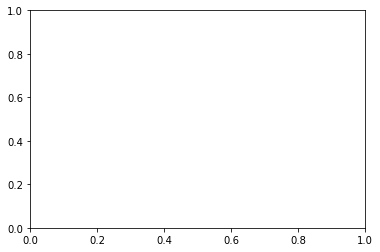

In [12]:
import seaborn as sns

sns.scatterplot(x='lat',
                y='long',
                hue='price_bin',
                xlabel='TEST',
                data=df)

<AxesSubplot:xlabel='lat', ylabel='long'>

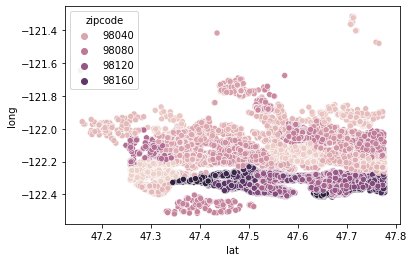

In [51]:
sns.scatterplot(x='lat',
                y='long',
                hue='zipcode',
                data=df)

In [17]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,47.5112,-122.257
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,47.7210,-122.319
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,47.6168,-122.045


In [34]:
# All NaN data is in waterfront column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
 11  zipcode      21597 non-null  int64  
 12  lat          21597 non-null  float64
 13  long         21597 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 2.3 MB


In [34]:

"""newest house is 2015
Waterfront: is 0-1, NaN values can be 0 given extremely low prportion of waterfront properties
    
"""
df.describe().price

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

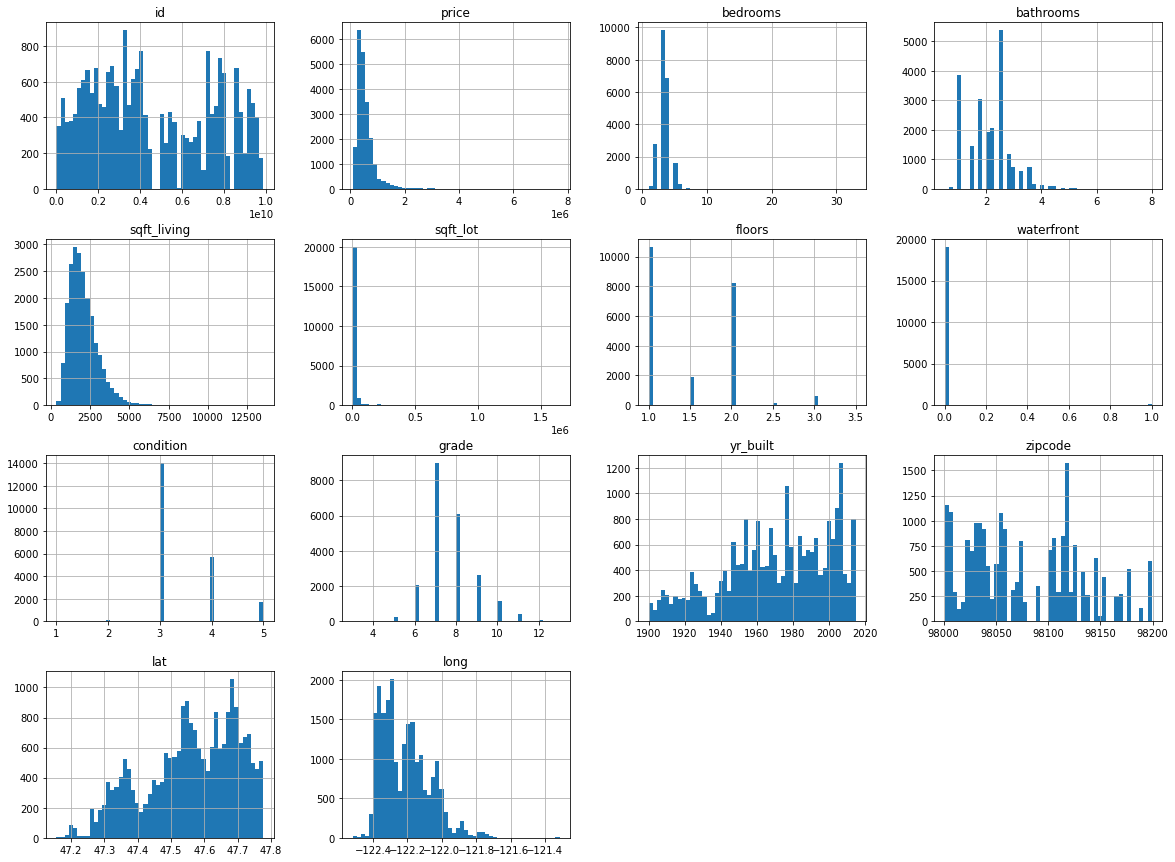

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

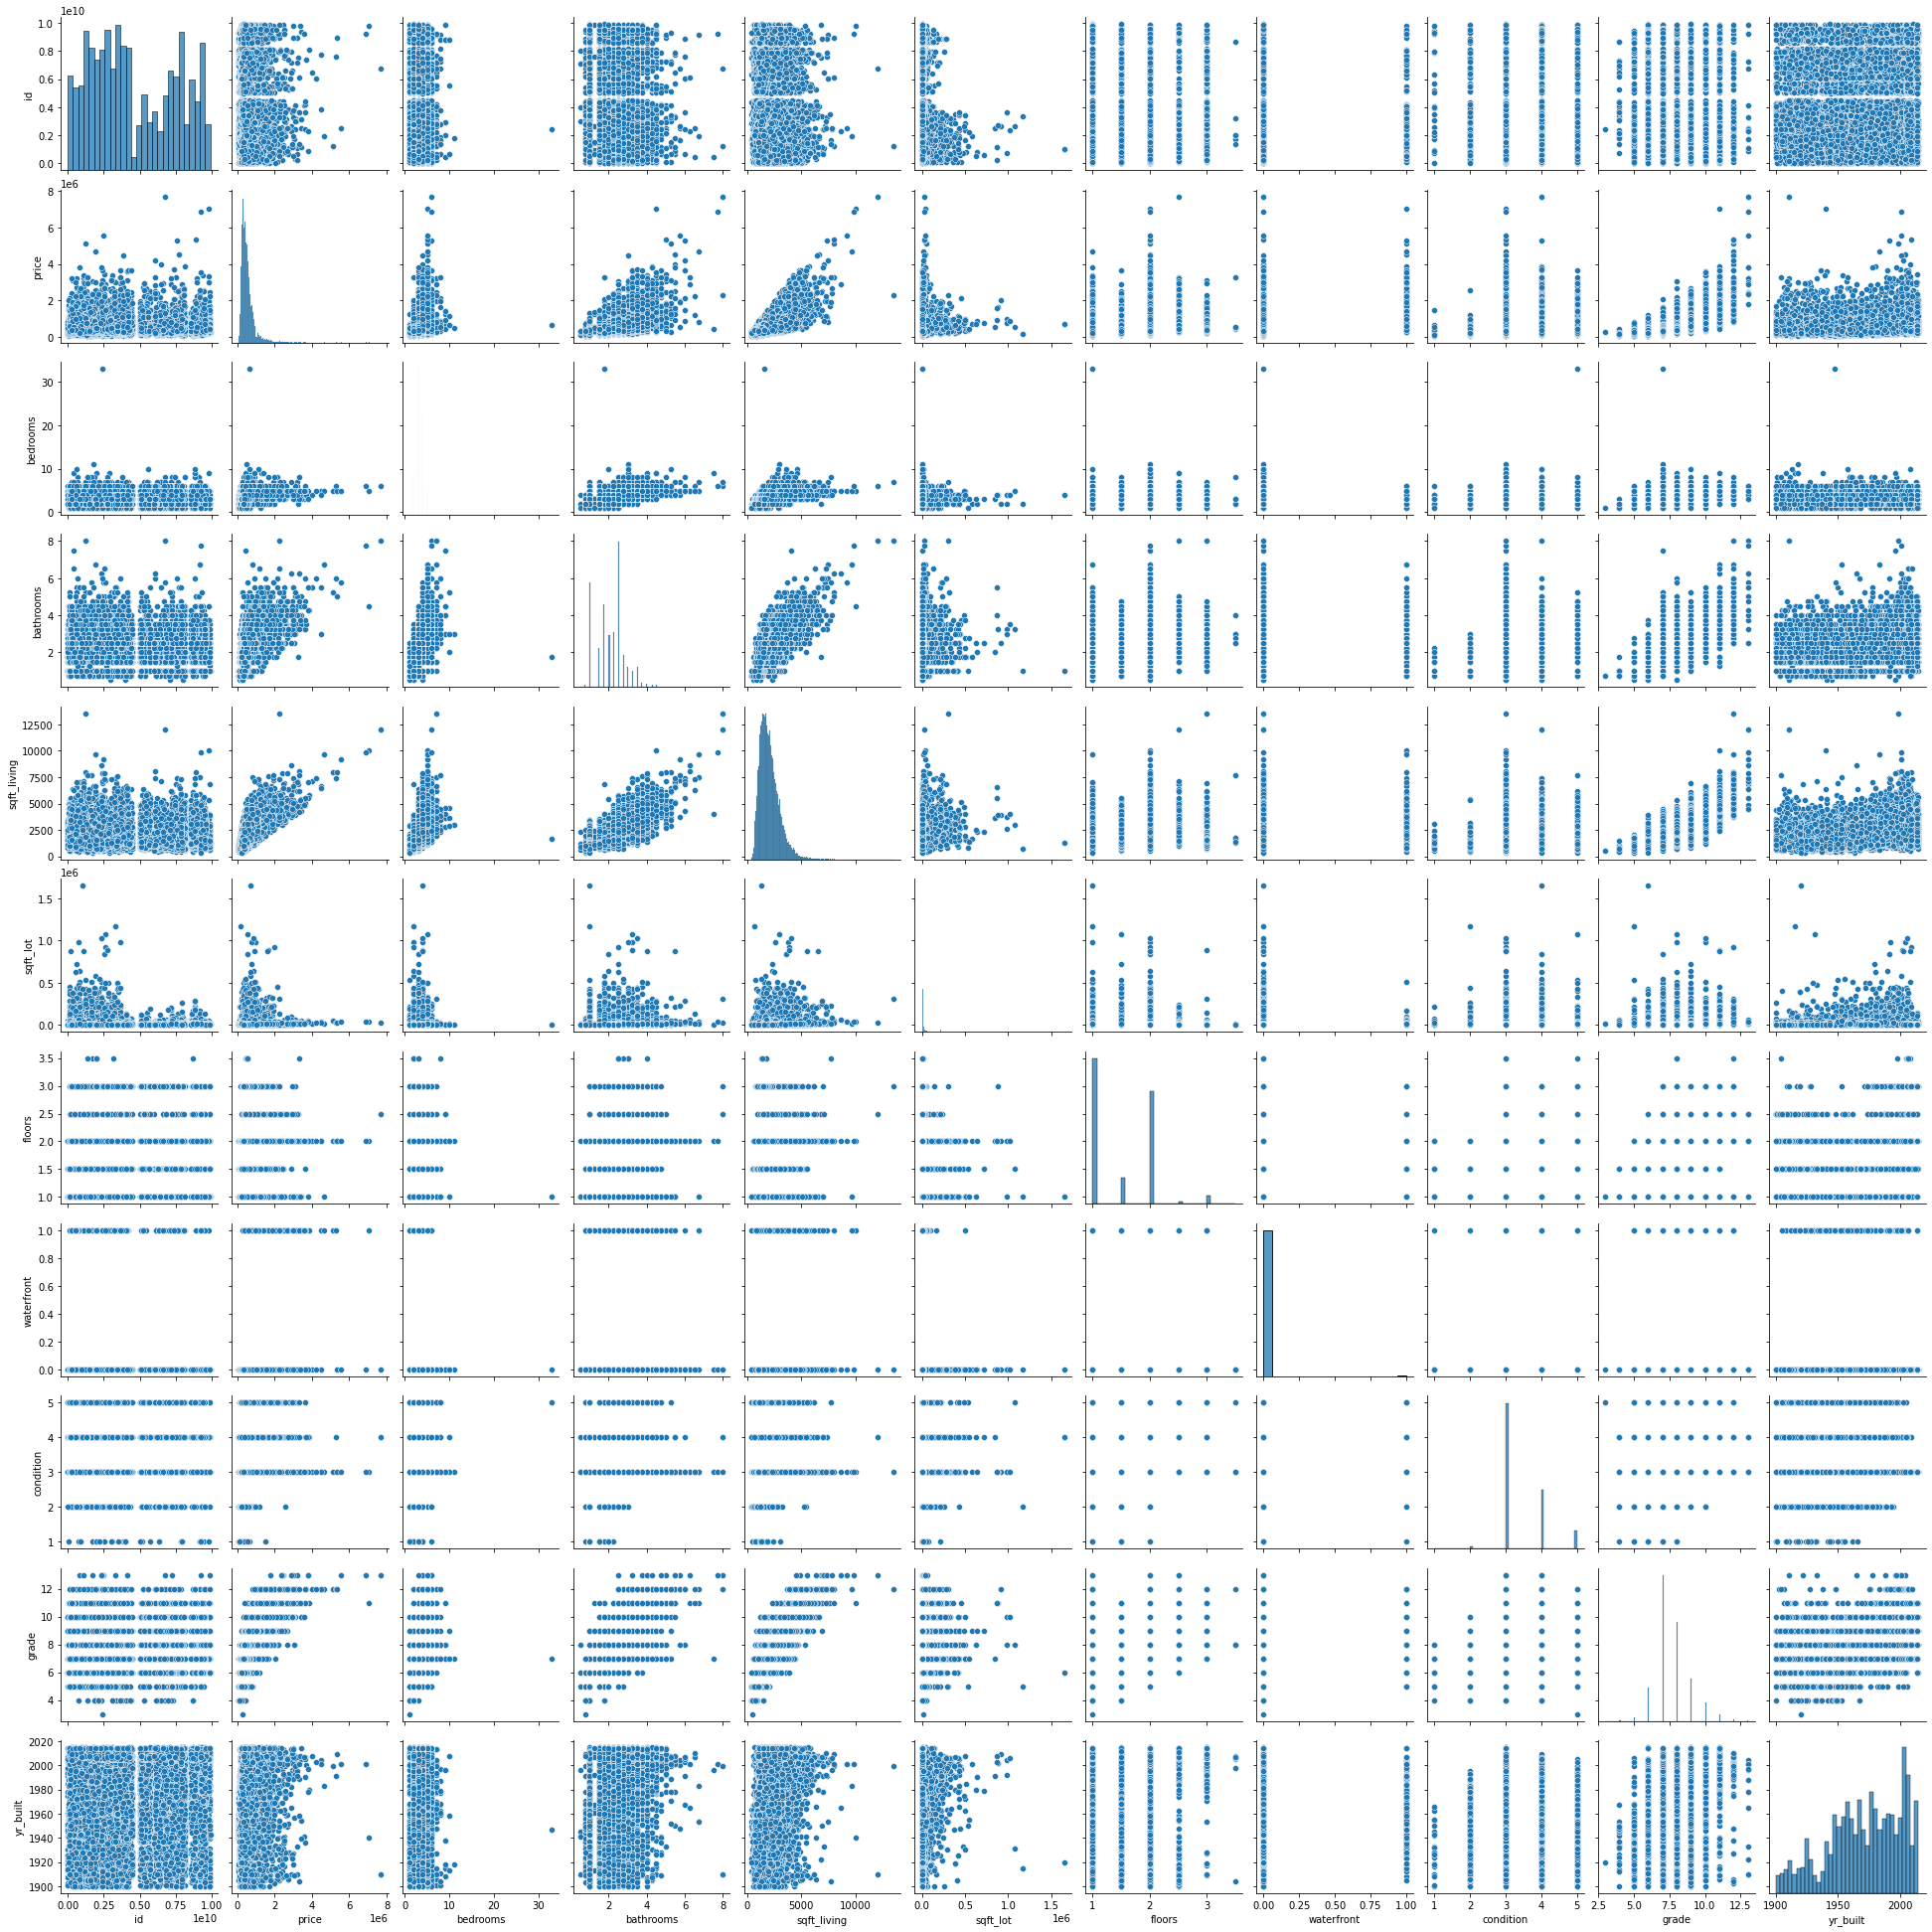

In [14]:
import seaborn as sns
sns.pairplot(df)

## Baseline Regression

In [38]:
cm.BaselineModel(df, y='price', xlist=['bedrooms', 'grade','condition'])

R-squared = 0.0 
 RMSE = 367359.634929548


In [55]:
cm.BaselineModel(df, y='cost', xlist=['bedrooms', 'grade','condition'])

R-squared = 0.0 
 RMSE = 140466.98502206933


## Scatters of Interest

### Housing Volume

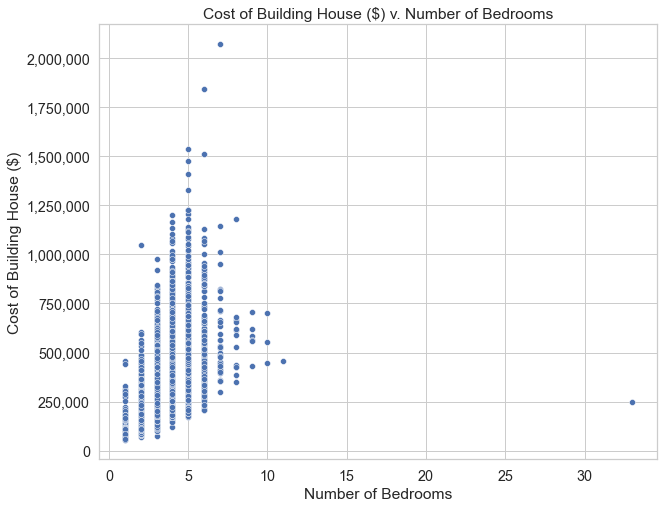

In [83]:
cm.PlotScatter(df, xvar='bedrooms', yvar='cost')

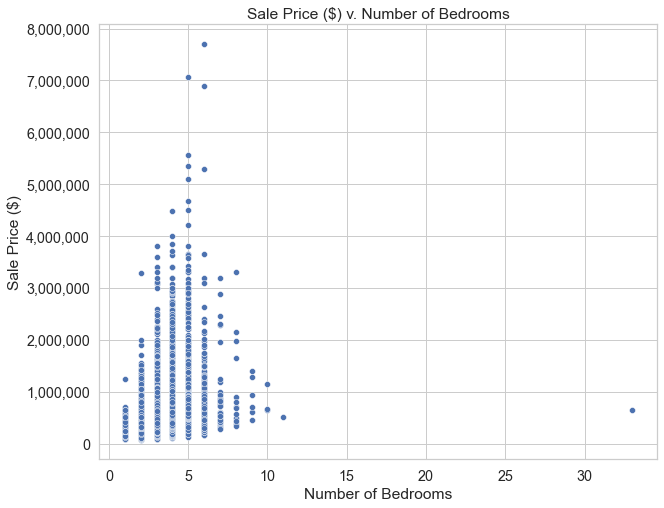

In [84]:
cm.PlotScatter(df, xvar='bedrooms', yvar='price')

### Grade

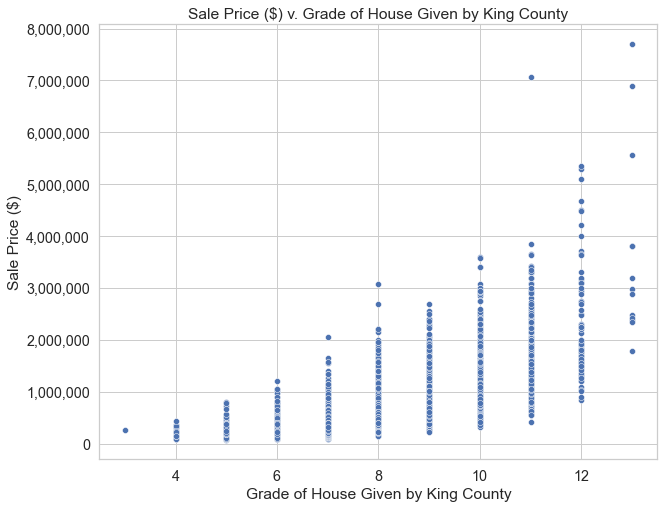

In [76]:
cm.PlotScatter(df, xvar='grade', yvar='price')

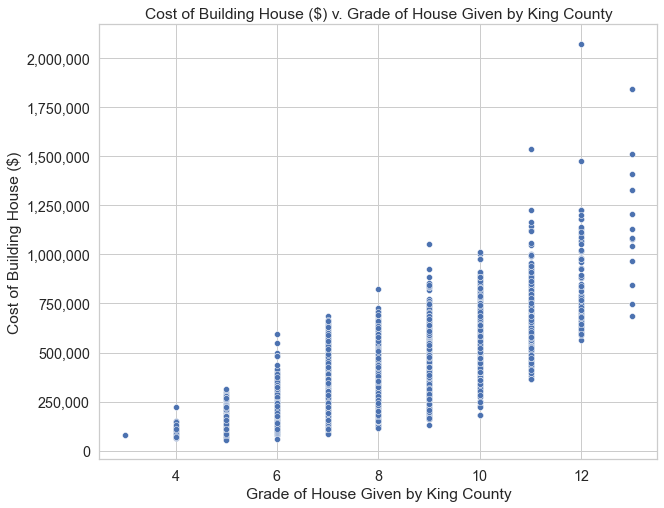

In [73]:
cm.PlotScatter(df, xvar='grade', yvar='cost')

## Histograms of Interest

### Price 

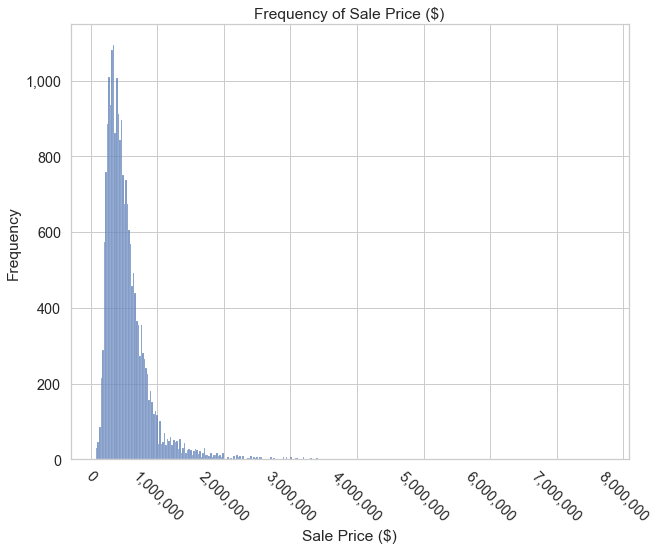

In [82]:
cm.PlotHist(df, xvar='price')

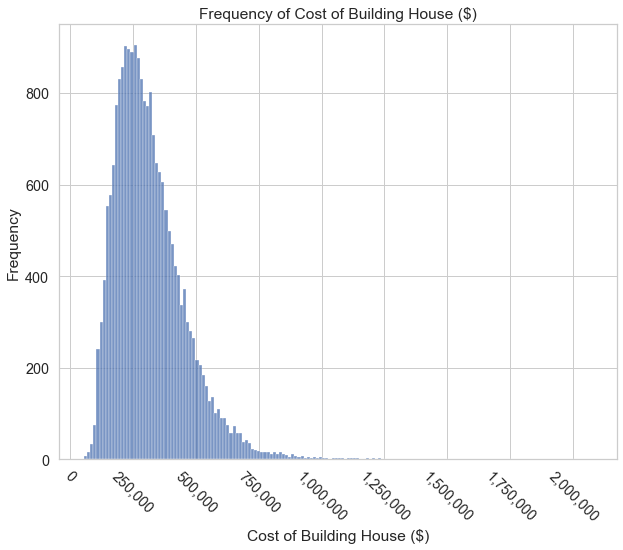

In [81]:
cm.PlotHist(df, xvar='cost')

## Cost of Building House
https://www.daveramsey.com/blog/how-much-does-it-cost-to-build-a-house
Abou $153 per sqft in 2017